In [1]:
%load_ext rpy2.ipython

In [261]:
import pandas as pd
import pyarrow.feather as feather
import pyarrow as pa
import pyarrow.parquet as pq

In [3]:
# replace this with the combined dataframe

df = pd.read_csv("data/14096681/data/ACCESS-CM2_daily_rainfall_NSW.csv")
df2 = pd.read_csv("data/14096681/data/GFDL-CM4_daily_rainfall_NSW.csv")
df3 = pd.read_csv("data/14096681/data/observed_daily_rainfall_SYD.csv")

In [4]:
# add a column called model

df["model"] = "ACCESS-CM2_daily_rainfall_NSW"
df2["model"] = "GFDL-CM4_daily_rainfall_NSW"
df3["model"] = "observed_daily_rainfall_SYD"

In [5]:
df3

,time,rain (mm/day),model
0,1889-01-01,0.006612,observed_daily_rainfall_SYD
1,1889-01-02,0.090422,observed_daily_rainfall_SYD
2,1889-01-03,1.401452,observed_daily_rainfall_SYD
3,1889-01-04,14.869798,observed_daily_rainfall_SYD
4,1889-01-05,0.467628,observed_daily_rainfall_SYD
...,...,...,...
46015,2014-12-27,0.037472,observed_daily_rainfall_SYD
46016,2014-12-28,0.158061,observed_daily_rainfall_SYD
46017,2014-12-29,0.025719,observed_daily_rainfall_SYD
46018,2014-12-30,0.729390,observed_daily_rainfall_SYD


In [6]:
# merge dataframes 

merge = pd.concat([df, df2, df3])

In [7]:
# final merged dataframe 

merge

,time,lat_min,lat_max,lon_min,lon_max,rain (mm/day),model
0,1889-01-01 12:00:00,-36.25,-35.0,140.625,142.5,3.293256e-13,ACCESS-CM2_daily_rainfall_NSW
1,1889-01-02 12:00:00,-36.25,-35.0,140.625,142.5,0.000000e+00,ACCESS-CM2_daily_rainfall_NSW
2,1889-01-03 12:00:00,-36.25,-35.0,140.625,142.5,0.000000e+00,ACCESS-CM2_daily_rainfall_NSW
3,1889-01-04 12:00:00,-36.25,-35.0,140.625,142.5,0.000000e+00,ACCESS-CM2_daily_rainfall_NSW
4,1889-01-05 12:00:00,-36.25,-35.0,140.625,142.5,1.047658e-02,ACCESS-CM2_daily_rainfall_NSW
...,...,...,...,...,...,...,...
46015,2014-12-27,NaN,NaN,NaN,NaN,3.747200e-02,observed_daily_rainfall_SYD
46016,2014-12-28,NaN,NaN,NaN,NaN,1.580613e-01,observed_daily_rainfall_SYD
46017,2014-12-29,NaN,NaN,NaN,NaN,2.571914e-02,observed_daily_rainfall_SYD
46018,2014-12-30,NaN,NaN,NaN,NaN,7.293899e-01,observed_daily_rainfall_SYD


In [258]:
%%time
%%R -i merge

# transfer dataframe to R as a csv

library(tidyverse)
library(here)
library(feather)

start_time <- Sys.time()
result <- merge %>% count(model)
print(result)
end_time <- Sys.time()
print(end_time - start_time)

                          model       n
1 ACCESS-CM2_daily_rainfall_NSW 1932840
2   GFDL-CM4_daily_rainfall_NSW 3219300
3   observed_daily_rainfall_SYD   46020
Time difference of 0.213279 secs
CPU times: user 2min 9s, sys: 8.04 s, total: 2min 17s
Wall time: 2min 31s


In [8]:
%%time
# write the dataframe to feather format 

feather.write_feather(merge, 'data/final_data.feather')

In [265]:
%%time

# write the dataframe to parquet format
# source - https://stackoverflow.com/questions/41066582/python-save-pandas-data-frame-to-parquet-file

table = pa.Table.from_pandas(merge)
pq.write_table(table, 'data/final_data.parquet')

CPU times: user 1.77 s, sys: 376 ms, total: 2.14 s
Wall time: 2.02 s


In [257]:
%%time
%%R 

# transfer dataframe to R as a feather

library(tidyverse)
library(here)
library(feather)

file_path = here("data", "final_data.feather")
start_time <- Sys.time()
df <- arrow::read_feather(file_path)
result <- df %>% count(model)
print(result)
end_time <- Sys.time()
print(end_time - start_time)

# A tibble: 3 x 2
  model                               n
* <chr>                           <int>
1 ACCESS-CM2_daily_rainfall_NSW 1932840
2 GFDL-CM4_daily_rainfall_NSW   3219300
3 observed_daily_rainfall_SYD     46020
Time difference of 2.220245 secs
CPU times: user 1.22 s, sys: 940 ms, total: 2.16 s
Wall time: 2.32 s


In [267]:
%%time
%%R 

# transfer dataframe to R as a parquet 

library(arrow)

file_path = here("data", "final_data.parquet")
start_time <- Sys.time()
df <- read_parquet(file_path)
result <- df %>% count(model)
print(result)
end_time <- Sys.time()
print(end_time - start_time)

R[write to console]: 
Attaching package: ‘arrow’


R[write to console]: The following objects are masked from ‘package:feather’:

    read_feather, write_feather


R[write to console]: The following object is masked from ‘package:utils’:

    timestamp




# A tibble: 3 x 2
  model                               n
* <chr>                           <int>
1 ACCESS-CM2_daily_rainfall_NSW 1932840
2 GFDL-CM4_daily_rainfall_NSW   3219300
3 observed_daily_rainfall_SYD     46020
Time difference of 4.098216 secs
CPU times: user 2.26 s, sys: 1.38 s, total: 3.64 s
Wall time: 5.17 s


In [268]:
%%sh

du -sh data/final_data.feather
du -sh data/final_data.parquet

112M	data/final_data.feather
 80M	data/final_data.parquet


**Reasoning**

1 - https://luminousmen.com/post/big-data-file-formats
2 - https://stackoverflow.com/questions/48083405/what-are-the-differences-between-feather-and-parquet

From the exploration of the different memory and time usage, we can see that parquet files store less memory then the feather files. This is due to the use of dictionary encoding and certain compressions that make this possible (2). Furthermore, the time it takes to do a basic reading action is much faster for parquet and feather files than csv files because in csv files, it is reading the entire dataframe to get a simple answer to our count query. However, parquet files store the metadata of the file and can easily access the columns and read the files without having to go through all the columns. This is why it is much faster than csv files. However, on my computer, the feather and parquet files take a similar amount for a simple count query. We hypothesize that this may be due to the fact that our files are not large enough for us to see the difference. But we have to consider that we will be using Spark as tool on the cloud and Parquet files are easily transferable to Spark (2) and because of this reason, we will be choosing the parquet files as our final choice. 

In [18]:
%%R

df

# A tibble: 5,198,160 x 7
   time         lat_min lat_max lon_min lon_max `rain (mm/day)` model           
   <chr>          <dbl>   <dbl>   <dbl>   <dbl>           <dbl> <chr>           
 1 1889-01-01 …   -36.2     -35    141.    142.        3.29e-13 ACCESS-CM2_dail…
 2 1889-01-02 …   -36.2     -35    141.    142.        0.       ACCESS-CM2_dail…
 3 1889-01-03 …   -36.2     -35    141.    142.        0.       ACCESS-CM2_dail…
 4 1889-01-04 …   -36.2     -35    141.    142.        0.       ACCESS-CM2_dail…
 5 1889-01-05 …   -36.2     -35    141.    142.        1.05e- 2 ACCESS-CM2_dail…
 6 1889-01-06 …   -36.2     -35    141.    142.        3.29e- 2 ACCESS-CM2_dail…
 7 1889-01-07 …   -36.2     -35    141.    142.        8.91e- 2 ACCESS-CM2_dail…
 8 1889-01-08 …   -36.2     -35    141.    142.        3.16e- 2 ACCESS-CM2_dail…
 9 1889-01-09 …   -36.2     -35    141.    142.        3.11e- 2 ACCESS-CM2_dail…
10 1889-01-10 …   -36.2     -35    141.    142.        3.30e- 2 ACCESS-CM2_dail…
# 

In [75]:
%%R

#total number of unique models will be larger once we have all of them 

length(unique(df$model))

[1] "ACCESS-CM2_daily_rainfall_NSW" "GFDL-CM4_daily_rainfall_NSW"  
[3] "observed_daily_rainfall_SYD"  


In [19]:
%%R

# rename the column 

df <- df %>% dplyr::rename("rainfall" = `rain (mm/day)`)

In [255]:
%%R

library(lubridate)

test <- df %>% ifelse(model == "observed_daily_rainfall_SYD", mutate(time = ymd(time)), mutate(time = ymd_hms(time)))

R[write to console]: Error in ifelse(., model == "observed_daily_rainfall_SYD", mutate(time = ymd(time)),  : 
  unused argument (mutate(time = ymd_hms(time)))




Error in ifelse(., model == "observed_daily_rainfall_SYD", mutate(time = ymd(time)),  : 
  unused argument (mutate(time = ymd_hms(time)))


In [203]:
%%R

# convert all times to the same format

library(lubridate)

first <- df %>% filter(model == "observed_daily_rainfall_SYD") %>% mutate(time = ymd(time))
second <- df %>% filter(model != "observed_daily_rainfall_SYD") %>% mutate(time = ymd_hms(time)) %>% mutate(time = format(time, format = "%Y-%m-%d"))

final <- rbind(first, second)

# add a column for year

final <- final %>% mutate(year = year(df_test$time))

In [197]:
%%R

# sanity check 

final %>% filter(model == "observed_daily_rainfall_SYD")

# A tibble: 46,020 x 7
   time       lat_min lat_max lon_min lon_max rainfall model                    
   <date>       <dbl>   <dbl>   <dbl>   <dbl>    <dbl> <chr>                    
 1 1889-01-01      NA      NA      NA      NA  0.00661 observed_daily_rainfall_…
 2 1889-01-02      NA      NA      NA      NA  0.0904  observed_daily_rainfall_…
 3 1889-01-03      NA      NA      NA      NA  1.40    observed_daily_rainfall_…
 4 1889-01-04      NA      NA      NA      NA 14.9     observed_daily_rainfall_…
 5 1889-01-05      NA      NA      NA      NA  0.468   observed_daily_rainfall_…
 6 1889-01-06      NA      NA      NA      NA  0       observed_daily_rainfall_…
 7 1889-01-07      NA      NA      NA      NA  0.404   observed_daily_rainfall_…
 8 1889-01-08      NA      NA      NA      NA  0.112   observed_daily_rainfall_…
 9 1889-01-09      NA      NA      NA      NA  0       observed_daily_rainfall_…
10 1889-01-10      NA      NA      NA      NA  0       observed_daily_rainfall_…
# … w

In [198]:
%%R

# filter the data for 2014 to compare against one model 

df_2014 <- final %>% select(time, model, rainfall) %>% filter(time>='2014-01-01' & time<='2014-12-31')

df_2014

# A tibble: 41,245 x 3
   time       model                       rainfall
   <date>     <chr>                          <dbl>
 1 2014-01-01 observed_daily_rainfall_SYD  0.00661
 2 2014-01-02 observed_daily_rainfall_SYD  0.0301 
 3 2014-01-03 observed_daily_rainfall_SYD  0.640  
 4 2014-01-04 observed_daily_rainfall_SYD  0.0147 
 5 2014-01-05 observed_daily_rainfall_SYD  0.128  
 6 2014-01-06 observed_daily_rainfall_SYD  0.0162 
 7 2014-01-07 observed_daily_rainfall_SYD  0.447  
 8 2014-01-08 observed_daily_rainfall_SYD  3.32   
 9 2014-01-09 observed_daily_rainfall_SYD  0.204  
10 2014-01-10 observed_daily_rainfall_SYD  0.419  
# … with 41,235 more rows


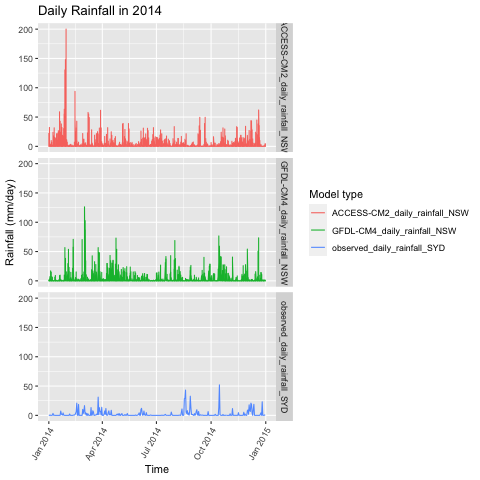

In [200]:
%%R

# looks at the rainfal predictions over time for the year 2014

library(ggplot2)

rainfall <- ggplot(df_2014, aes(x=time, y=rainfall)) +
    geom_line(aes(color = model)) +
    facet_grid(model ~ .) + #ncol = 5) + #play around with facet_wrap() and ncol to ensure everything fits
    theme(axis.text.x=element_text(angle=60, hjust=1)) +
    labs(title = "Daily Rainfall in 2014", x = "Time", y = "Rainfall (mm/day)", color = "Model type") 

rainfall

In [201]:
%%R

#summary of the dataframe overall

apply(final, MARGIN=2, FUN=summary)

       time        lat_min     lat_max     lon_min     lon_max     rainfall   
Length "5198160"   "5198160"   "5198160"   "5198160"   "5198160"   "5198160"  
Class  "character" "character" "character" "character" "character" "character"
Mode   "character" "character" "character" "character" "character" "character"
       model      
Length "5198160"  
Class  "character"
Mode   "character"


In [169]:
%%R

# applies the mean on all the models

tapply(final$rainfall, final$model, mean)

ACCESS-CM2_daily_rainfall_NSW   GFDL-CM4_daily_rainfall_NSW 
                     1.787025                      1.414485 
  observed_daily_rainfall_SYD 
                     2.747656 


`summarise()` has grouped output by 'year'. You can override using the `.groups` argument.


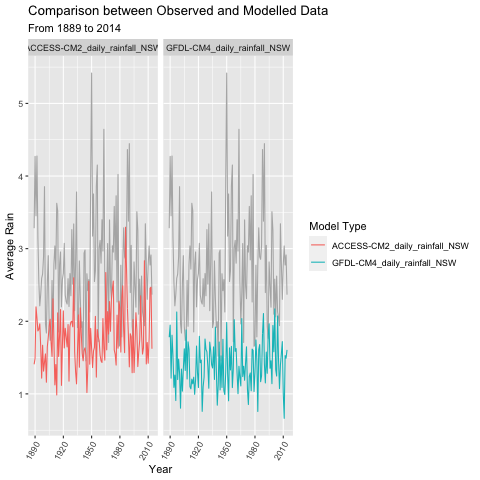

In [233]:
%%R

#comparing the average rain fall overtime - comparing modelled vs observed

avg <- final %>% group_by(year, model) %>% 
summarise(avg_rain = mean(rainfall))

avg_final <- avg[!(avg$model=="observed_daily_rainfall_SYD"),]

df2 <- avg %>% filter(model == "observed_daily_rainfall_SYD") %>% select(-model) 

avg_rainfall <- ggplot(avg_final, aes(x = year, y = avg_rain)) +
                geom_line(data = df2, colour =  "grey70") +
                geom_line(aes(colour = model)) +
                facet_wrap(~model, ncol = 5) + #play around with facet_grid/
                theme(axis.text.x=element_text(angle=60, hjust=1)) +
                labs(title = "Comparison between Observed and Modelled Data",subtitle = "From 1889 to 2014", x = "Year", y = "Average Rain", color = "Model Type")
    
avg_rainfall

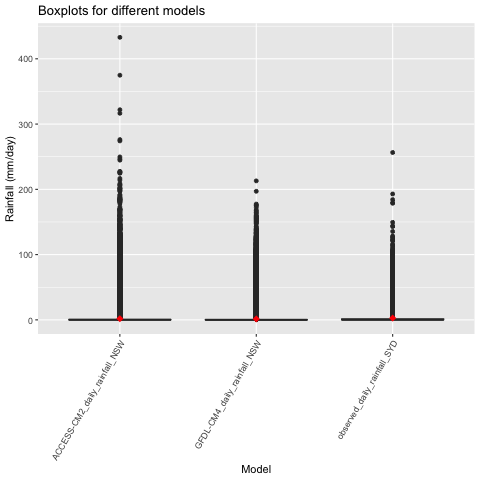

In [66]:
%%R

# boxplot for the different models with the mean highlighted

df_boxplot <- df %>% select(model, rainfall)

ggplot(df_boxplot, aes(x = model, y = rainfall)) +
geom_boxplot() +
stat_summary(fun=mean, colour="red", geom="point", 
               shape=18, size=3, show.legend=FALSE) +
theme(axis.text.x=element_text(angle=60, hjust=1)) +
labs(title = "Boxplots for different models", x = "Model", y = "Rainfall (mm/day)")

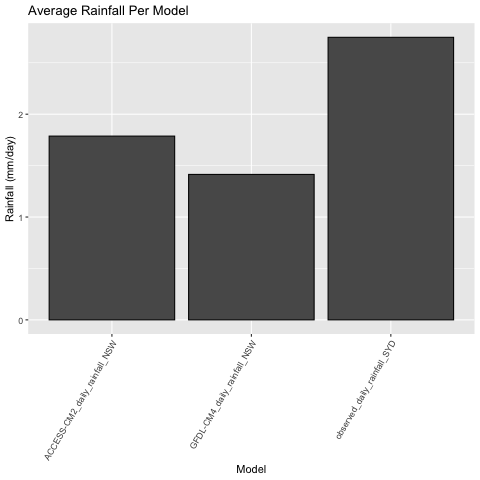

In [74]:
%%R

# plots the average rainfall for all the models over all the years

df_errorbar <- df %>% select(model, rainfall) %>%
group_by(model) %>% summarise(avg_rain = mean(rainfall))

ggplot(df_errorbar, aes(x = model, y = avg_rain)) +
geom_bar(stat="identity", color="black", 
           position=position_dodge())+
theme(axis.text.x=element_text(angle=60, hjust=1)) +
labs(title = "Average Rainfall Per Model", x = "Model", y = "Rainfall (mm/day)")

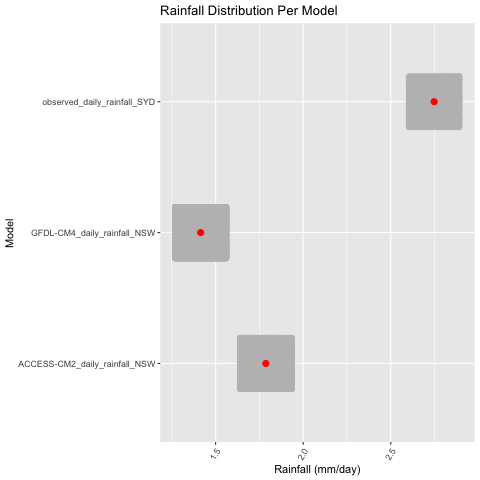

In [229]:
%%R

# plots the average rainfall as a jitterplot

df_jitter <- df %>% select(model, rainfall) %>%
group_by(model) %>% mutate(avg_rain = mean(rainfall))

ggplot(df_jitter, aes(y = model, x = avg_rain)) +
geom_jitter(alpha=0.1, height=0.2, color = "grey")+
theme(axis.text.x=element_text(angle=60, hjust=1)) +
geom_pointrange(stat = 'summary', fun.data = mean_cl_normal,
                        color = 'red') + 
labs(title = "Rainfall Distribution Per Model", y = "Model", x = "Rainfall (mm/day)")